# Instalasi Library dan Pembacaan Data

Nama    :Akmal Muzakki Bakir
NIM     :1305210087

In [2]:
!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.8 MB 1.3 MB/s eta 0:00:12
     ---------------------------------------- 0.1/14.8 MB 1.2 MB/s eta 0:00:13
     ---------------------------------------- 0.1/14.8 MB 1.2 MB/s eta 0:00:13
     ---------------------------------------- 0.1/14.8 MB 1.2 MB/s eta 0:00:13
     ---------------------------------------- 0.1/14.8 MB 1.2 MB/s eta 0:00:13
     ---------------------------------------- 0.1/14.8 MB 1.

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\akmal\\miniconda3\\envs\\clustering\\Lib\\site-packages\\numpy\\core\\tests\\test_arraymethod.py'
Consider using the `--user` option or check the permissions.



In [284]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [251]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [200]:
# Periksa missing value
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [201]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

# Analisis Data

In [202]:
# Gender
sns.countplot(data['Gender'])

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

In [203]:
# Age
sns.distplot(data['Age'], bins=5)

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

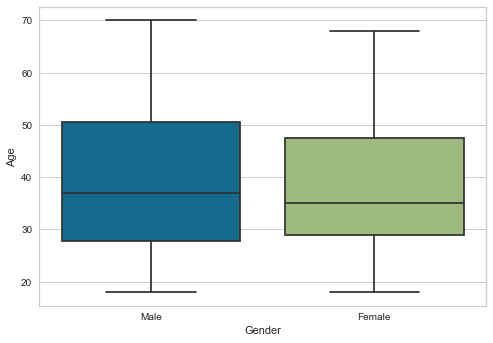

In [204]:
sns.boxplot(data['Gender'], data['Age'])

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

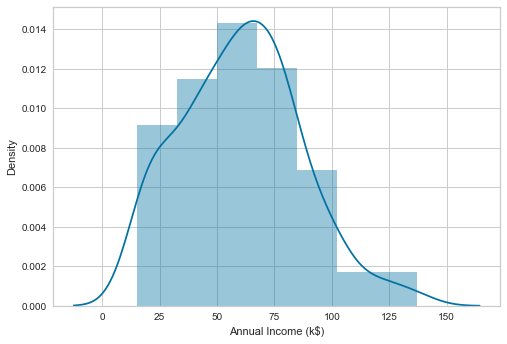

In [205]:
# Annual Income
sns.distplot(data['Annual Income (k$)'], bins=7)

In [206]:
sns.boxplot(data['Gender'], data['Annual Income (k$)'])

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

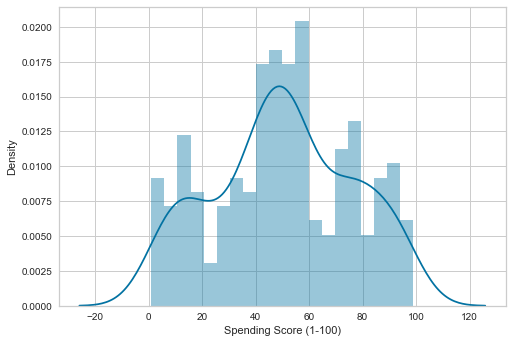

In [207]:
# Spending Score
sns.distplot(data['Spending Score (1-100)'], bins=20)

In [208]:
sns.boxplot(data['Gender'], data['Spending Score (1-100)'])

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

<AxesSubplot:>

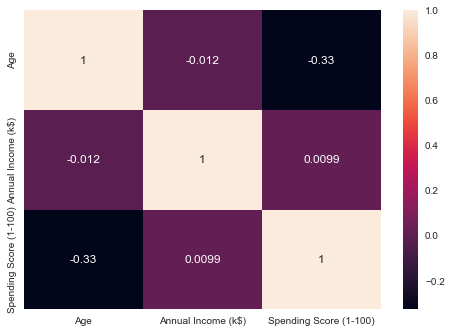

In [209]:
# Korelasi antar variabel
sns.heatmap(data.drop('CustomerID', axis=1).corr(), annot=True)

In [210]:
data = data.drop(columns=['CustomerID'])

In [211]:
sns.jointplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['Gender'])

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


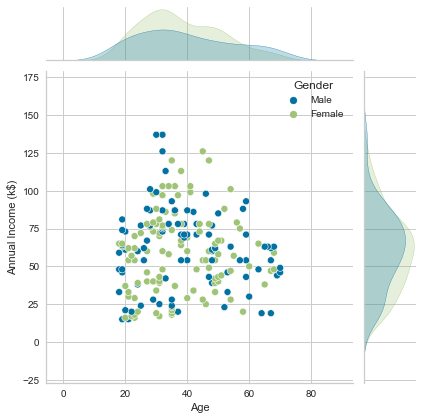

In [212]:
sns.jointplot(data['Age'], data['Annual Income (k$)'], hue=data['Gender'])

In [213]:
sns.jointplot(data['Age'], data['Spending Score (1-100)'], hue=data['Gender'])

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Preprocessing Data

In [252]:
# Scalling data
scaler = MinMaxScaler()
def normalize(data):
    for each in data.columns.tolist():
        if str(data[each].dtype) != 'object':
            data[each] = scaler.fit_transform(data[each].values.reshape(-1,1))

In [253]:
normalize(data)

In [254]:
data.head()

CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    0.000000    Male  0.019231            0.000000                0.387755
1    0.005025    Male  0.057692            0.000000                0.816327
2    0.010050  Female  0.038462            0.008197                0.051020
3    0.015075  Female  0.096154            0.008197                0.775510
4    0.020101  Female  0.250000            0.016393                0.397959

In [255]:
# Mengubah gender untuk setiap Male = 1, dan female = 0
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == "Male" else 0)
data.head()

CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    0.000000       1  0.019231            0.000000                0.387755
1    0.005025       1  0.057692            0.000000                0.816327
2    0.010050       0  0.038462            0.008197                0.051020
3    0.015075       0  0.096154            0.008197                0.775510
4    0.020101       0  0.250000            0.016393                0.397959

# Klasterisasi Data Annual Income dan Spending Score

### K-Means

In [256]:
data1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]

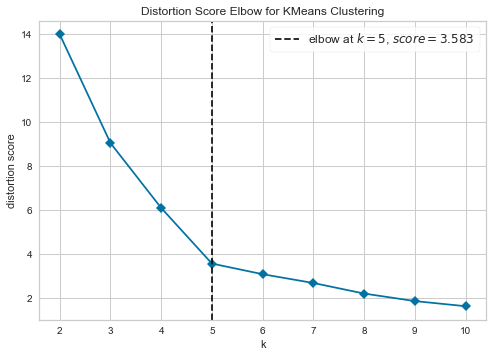

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [257]:
# Menentukan jumlah cluster dengan Elbow Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False)
visualizer.fit(data1)
visualizer.poof()

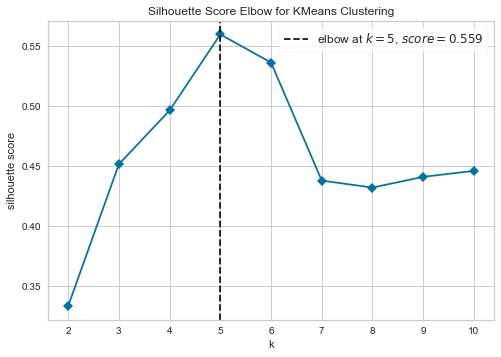

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [258]:
# Menentukan jumlah cluster dengan Silhouette Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)
visualizer.fit(data1)
visualizer.poof()

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


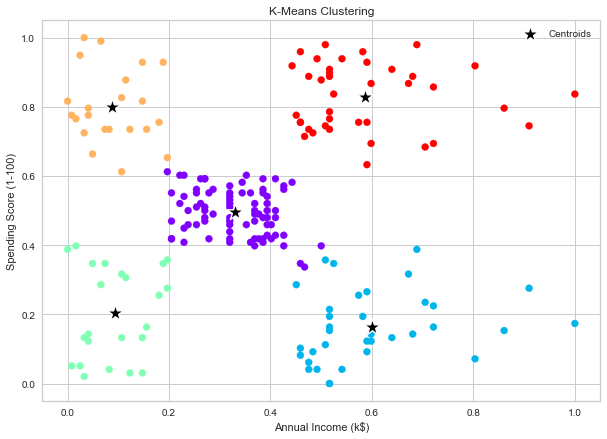

In [259]:
# Visualisasi data dengan K-Means
model = KMeans(n_clusters=5, init='k-means++', random_state=42)
model.fit(data1)
labels = model.predict(data1)
plt.figure(figsize=(10, 7))
plt.title("K-Means Clustering")
plt.scatter(data1['Annual Income (k$)'], data1['Spending Score (1-100)'], c=labels, cmap='rainbow')
sns.scatterplot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black', s=300, marker='*', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [260]:
data1['kmeans cluster'] = labels
data1.head()

C:\Users\akmal\AppData\Local\Temp\ipykernel_11252\899130410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['kmeans cluster'] = labels


Annual Income (k$)  Spending Score (1-100)  kmeans cluster
0            0.000000                0.387755               2
1            0.000000                0.816327               3
2            0.008197                0.051020               2
3            0.008197                0.775510               3
4            0.016393                0.397959               2

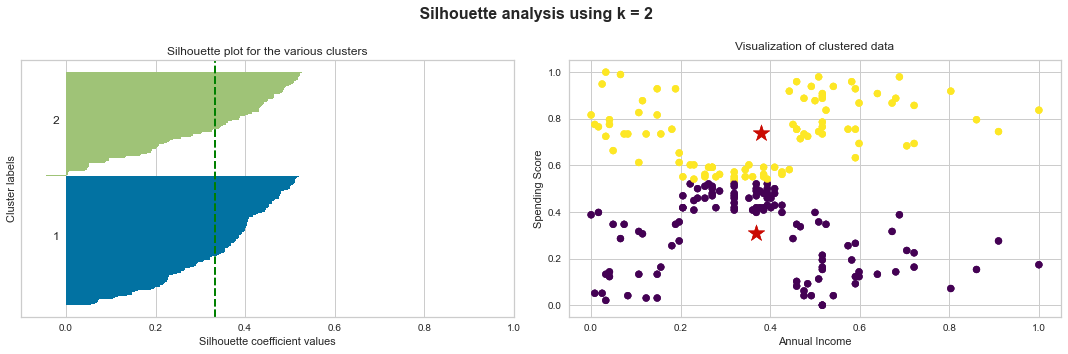

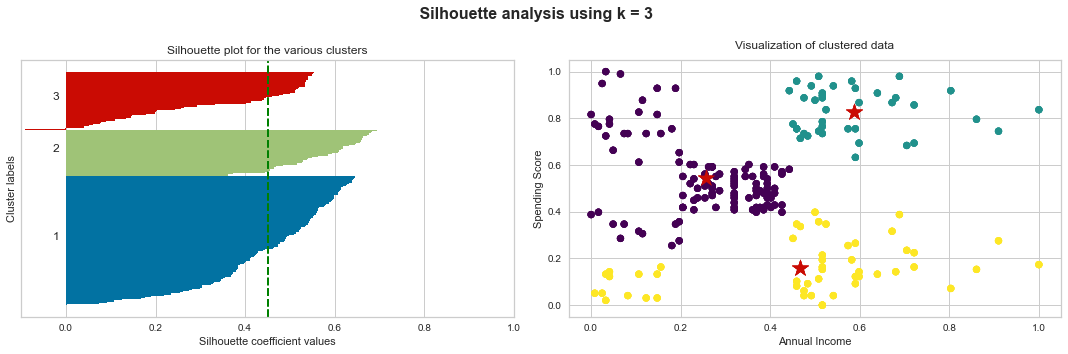

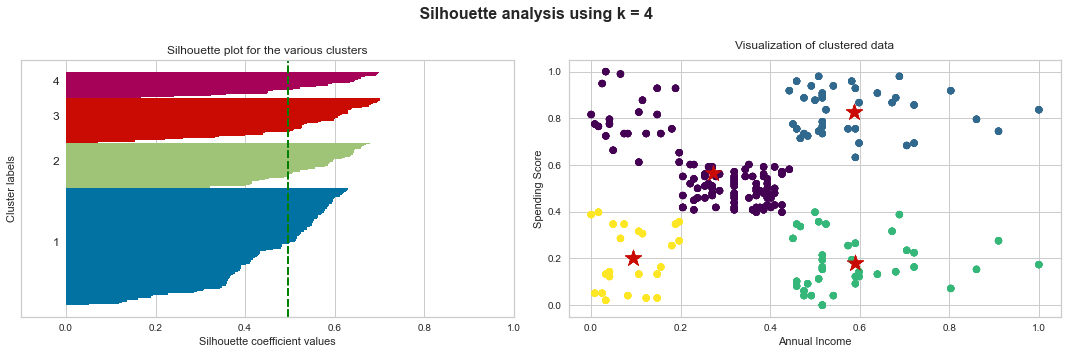

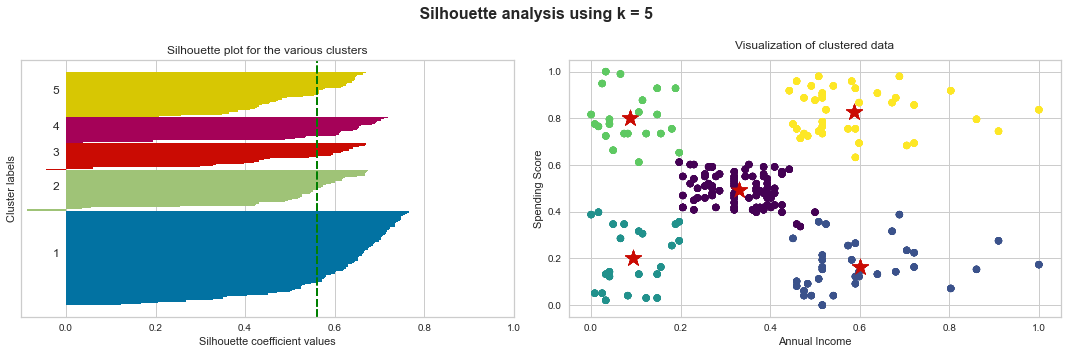

In [261]:
silh_score = []
for k in range(2,6):
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    km = KMeans(n_clusters=k,init='k-means++',random_state=42)
    clstr2 = km.fit(data1[['Annual Income (k$)','Spending Score (1-100)']])
    labels2 = clstr2.labels_
    centroids2 = clstr2.cluster_centers_
    silhoute_vals = silhouette_samples(data1[['Annual Income (k$)','Spending Score (1-100)']],labels2)
    silh_score.append(silhouette_score(data1[['Annual Income (k$)','Spending Score (1-100)']],labels2,metric='euclidean'))

    y_ticks = []
    y_lower = y_upper = 0
    for i, cluster in enumerate(np.unique(labels2)):
        cluster_silhouette_vals = silhoute_vals[labels2 == cluster]
        cluster_silhouette_vals.sort()
        y_upper +=len(cluster_silhouette_vals)

        ax[0].barh(range(y_lower,y_upper),cluster_silhouette_vals,height =1)

        ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)
        avg_score = np.mean(silhoute_vals)
        ax[0].axvline(avg_score,linestyle ='--',linewidth =2,color = 'green')
        ax[0].set_yticks([])
        ax[0].set_xlim([-0.1, 1])
        ax[0].set_xlabel('Silhouette coefficient values')
        ax[0].set_ylabel('Cluster labels')
        ax[0].set_title('Silhouette plot for the various clusters');
        ax[1].scatter(data1['Annual Income (k$)'], data1['Spending Score (1-100)'], c = labels2,cmap='viridis');
        ax[1].scatter(centroids2[:,0], centroids2[:,1], marker='*' , c='r', s=300);
        ax[1].set_xlabel('Annual Income')
        ax[1].set_ylabel('Spending Score')
        ax[1].set_title('Visualization of clustered data', y=1.02)

        plt.tight_layout()
        plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')

### DBSCAN

In [262]:
min_points = 6

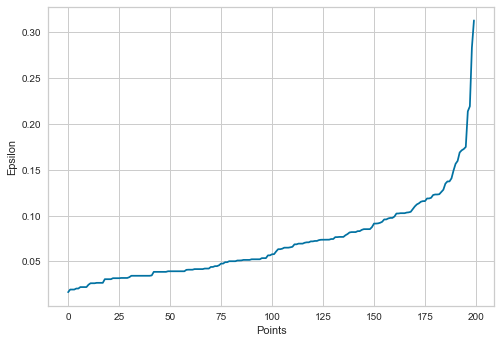

In [263]:
# Menghitung nilai epsilon yang tepat
nbrs = NearestNeighbors(n_neighbors=min_points, metric='euclidean').fit(data1[['Annual Income (k$)', 'Spending Score (1-100)']])
distance,indices = nbrs.kneighbors(data1[['Annual Income (k$)', 'Spending Score (1-100)']])
distances = np.sort(distance, axis=0)
distances = distances[:, 5]
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.show()

In [264]:
epsilon = 0.09

In [265]:
dbscan = DBSCAN(eps=epsilon, min_samples=min_points).fit(data1[['Annual Income (k$)', 'Spending Score (1-100)']])
lbls = dbscan.labels_
pd.Series(lbls).value_counts()

 2    96
 3    31
 4    24
-1    22
 1    15
 0    12
dtype: int64

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

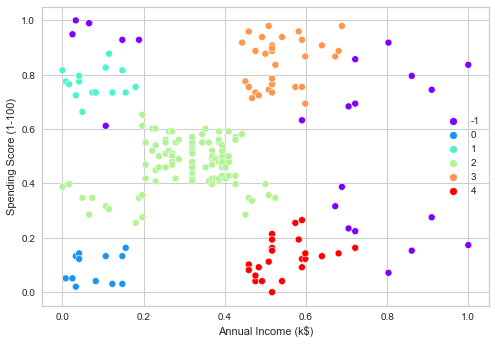

In [266]:
sns.scatterplot(data1['Annual Income (k$)'], data1['Spending Score (1-100)'], hue=lbls, palette='rainbow')

In [267]:
data1['DBScan cluster'] = lbls
data2 = data1[data1['DBScan cluster'] != -1]
data2.head()

C:\Users\akmal\AppData\Local\Temp\ipykernel_11252\1283024742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['DBScan cluster'] = lbls


Annual Income (k$)  Spending Score (1-100)  kmeans cluster  DBScan cluster
0            0.000000                0.387755               2               2
1            0.000000                0.816327               3               1
2            0.008197                0.051020               2               0
3            0.008197                0.775510               3               1
4            0.016393                0.397959               2               2

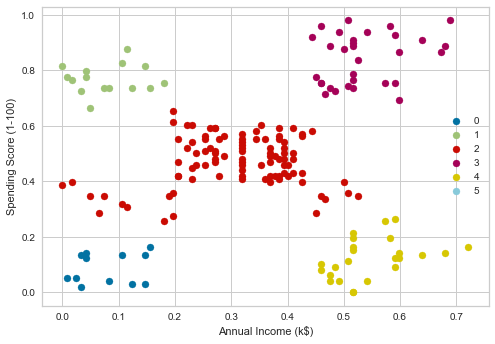

In [268]:
# Visualisasi data dengan DBSCAN
for each in range(0, pd.Series(lbls).value_counts().shape[0]):
    plt.scatter(data2[data2['DBScan cluster'] == each]['Annual Income (k$)'], data2[data2['DBScan cluster'] == each]['Spending Score (1-100)'], label=each)
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [272]:
silhouette_score(data2[['Annual Income (k$)', 'Spending Score (1-100)']], data2['DBScan cluster'], metric='euclidean')

0.5579938123816023

In [276]:
data2.head()

Annual Income (k$)  Spending Score (1-100)  kmeans cluster  DBScan cluster
0            0.000000                0.387755               2               2
1            0.000000                0.816327               3               1
2            0.008197                0.051020               2               0
3            0.008197                0.775510               3               1
4            0.016393                0.397959               2               2

In [290]:
# Menggabungkan data dengan cluster
data['kmeans cluster'] = data1['kmeans cluster']
data['DBScan cluster'] = data1['DBScan cluster']
data

CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0      0.000000       1  0.019231            0.000000                0.387755   
1      0.005025       1  0.057692            0.000000                0.816327   
2      0.010050       0  0.038462            0.008197                0.051020   
3      0.015075       0  0.096154            0.008197                0.775510   
4      0.020101       0  0.250000            0.016393                0.397959   
..          ...     ...       ...                 ...                     ...   
195    0.979899       0  0.326923            0.860656                0.795918   
196    0.984925       0  0.519231            0.909836                0.275510   
197    0.989950       1  0.269231            0.909836                0.744898   
198    0.994975       1  0.269231            1.000000                0.173469   
199    1.000000       1  0.230769            1.000000                0.836735   

     kmeans cluster  DBScan cluster  
0                 2               2  
1                 3               1  
2                 2               0  
3                 3               1  
4                 2               2  
..              ...             ...  
195               4              -1  
196               1              -1  
197               4              -1  
198               1              -1  
199               4              -1  

[200 rows x 7 columns]

C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


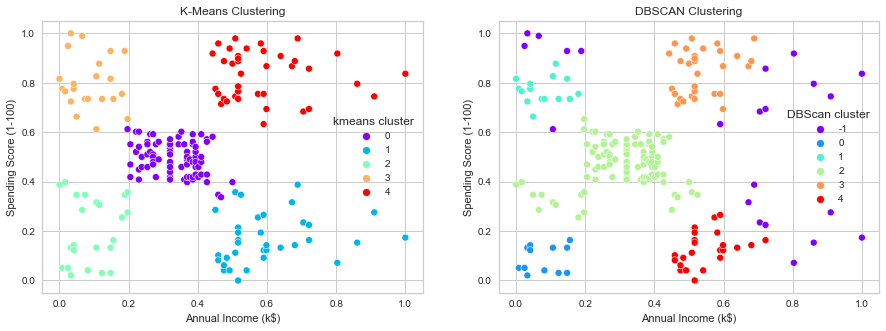

In [291]:
# Tampilkan grafik antara Annual Income dan Spending Score berdasarkan cluster
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['kmeans cluster'], palette='rainbow', ax=ax[0])
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['DBScan cluster'], palette='rainbow', ax=ax[1])
ax[0].set_title('K-Means Clustering')
ax[1].set_title('DBSCAN Clustering')
plt.show()